In [71]:
import pandas as pd

In [72]:
data = pd.read_csv('/content/tvmarketing.csv')
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [73]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [75]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

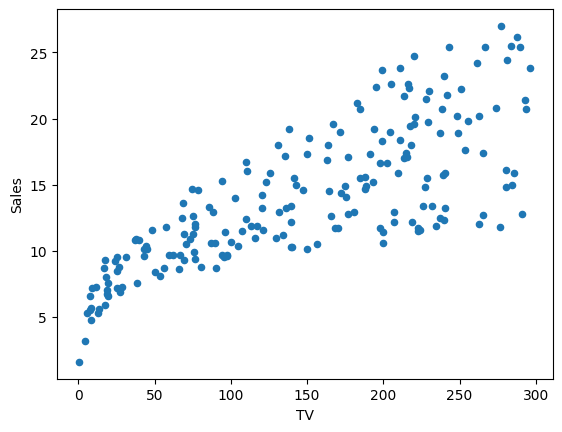

In [76]:
data.plot(x='TV', y='Sales',kind='scatter')

In [77]:
X= data['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [78]:
Y= data['Sales']
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0000)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [81]:
import numpy as np
X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]


In [82]:
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#fit the model using lr.fit()
lr.fit(X_train,Y_train)

LinearRegression()

# ***Coefficient Calculation***

In [83]:
# Print the Intercept and Coefficient
print(lr.coef_)
print(lr.intercept_)

[0.04581434]
7.310810165411681


# **Predictions**

In [84]:
# Make Predictions on the Testing Set
y_predict = lr.predict(X_test)
type(y_predict)

numpy.ndarray

In [85]:
print(X_test.shape)
print(y_predict.shape)

(60, 1)
(60,)


In [86]:
Y_test.shape

(60,)

Text(0, 0.5, 'Sales')

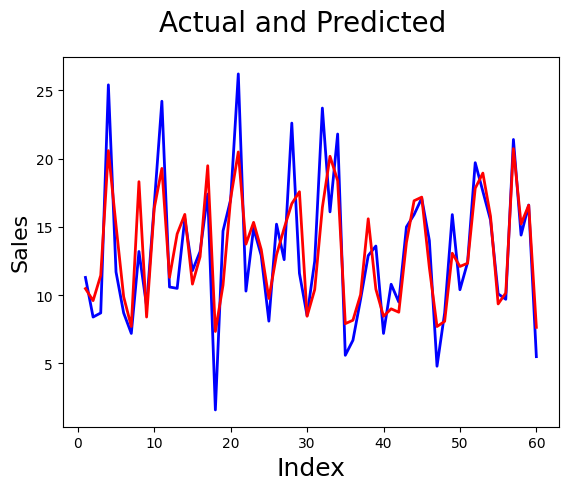

In [87]:
# Actual vs Predict
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)] #generating index
fig = plt.figure()
plt.plot(c,Y_test,color="blue", linewidth=2, linestyle="-",label="Actual")
plt.plot(c,y_predict,color="red",  linewidth=2, linestyle="-",label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label


Text(0, 0.5, 'Y_test-y_predict')

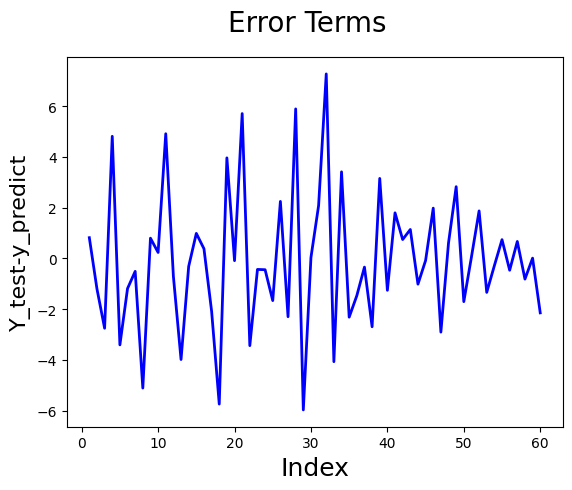

In [88]:
# Error Terms
c= [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-y_predict,color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Y_test-y_predict', fontsize=16)                               # Y-label

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_predict)
r_squared = r2_score(Y_test, y_predict)
print('Mean_Squared_Error :',mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


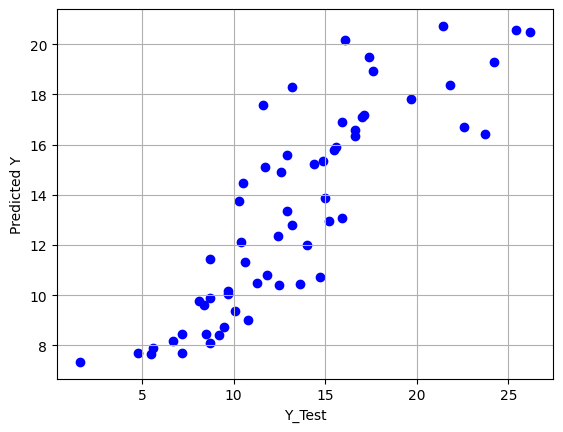

In [95]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

# linkcode
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_predict,c='blue')
plt.xlabel('Y_Test')
plt.ylabel('Predicted Y')
plt.grid()